# **Hugging DataSet**

## **Install Library**

In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## **Importing Library**

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

## **Loading the Data Set**

In [3]:



# Loading the dataset from Hugging Face
dataset = load_dataset("tanzuhuggingface/creditcardfraudtraining")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/182 [00:00<?, ?B/s]

credit_card_resampled.csv:   0%|          | 0.00/163M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2085138 [00:00<?, ? examples/s]

## **Creating the Data Frame**

In [4]:
Credit_df  = pd.DataFrame(dataset['train'])

In [5]:

Credit_df


,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
0,0,347210,1,4.158950e+15,3.340000,40.430800,-79.920500,0
1,1,347244,1,4.797300e+18,16.540000,38.893800,-86.524600,0
2,2,347249,1,4.586810e+15,29.840000,32.548600,-80.307000,0
3,3,347278,1,4.956830e+18,101.560000,40.674700,-74.223900,0
4,4,347293,2,4.561550e+12,3.590000,34.988900,-106.061000,0
...,...,...,...,...,...,...,...,...
2085133,2085133,621655,4,-2.124232e+18,153.984941,38.734121,-105.612185,1
2085134,2085134,198665,13,1.623557e+18,897.472037,31.135096,-76.789361,1
2085135,2085135,-115788,11,-8.426380e+17,1301.453019,47.524165,-31.288224,1
2085136,2085136,1191690,9,2.692801e+18,311.180351,47.411219,-50.518979,1


# **Exploratry Data Analysis**

In [6]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085138 entries, 0 to 2085137
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   index         int64  
 2   time_elapsed  int64  
 3   cc_num        float64
 4   amt           float64
 5   lat           float64
 6   long          float64
 7   is_fraud      int64  
dtypes: float64(4), int64(4)
memory usage: 127.3 MB


In [7]:
Credit_df['is_fraud'].value_counts()

,count
is_fraud,
0,1042569
1,1042569


## **Cout Plot**

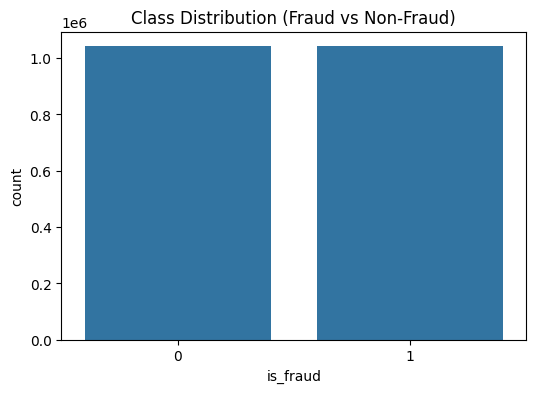

In [8]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=Credit_df )
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


## **Missing Values**

In [9]:
# Check for missing values
print("Missing values per column:")
print(Credit_df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(Credit_df.dtypes)


Missing values per column:
id              0
index           0
time_elapsed    0
cc_num          0
amt             0
lat             0
long            0
is_fraud        0
dtype: int64

Data types of each column:
id                int64
index             int64
time_elapsed      int64
cc_num          float64
amt             float64
lat             float64
long            float64
is_fraud          int64
dtype: object


In [10]:
# Summary statistics
Credit_df.describe()

,id,index,time_elapsed,cc_num,amt,lat,long,is_fraud
count,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2.085138e+06,2085138.0
mean,1.042568e+06,5.049692e+05,1.169697e+00,3.965088e+17,2.992306e+02,3.858014e+01,-9.004107e+01,0.5
std,6.019276e+05,4.089742e+05,7.291183e+00,1.637756e+18,4.955343e+02,6.704931e+00,1.827680e+01,0.5
min,0.000000e+00,-1.612912e+06,-3.000000e+01,-6.986079e+18,-2.159578e+03,1.511058e+00,-2.269371e+02,0.0
25%,5.212842e+05,2.117852e+05,0.000000e+00,6.304420e+11,1.501000e+01,3.408775e+01,-9.925484e+01,0.0
50%,1.042568e+06,5.054810e+05,0.000000e+00,3.543300e+15,8.474000e+01,3.911268e+01,-8.799734e+01,0.5
75%,1.563853e+06,8.031388e+05,2.000000e+00,5.330299e+17,5.406551e+02,4.272800e+01,-7.844002e+01,1.0
max,2.085137e+06,2.794497e+06,8.300000e+01,1.122925e+19,2.894890e+04,9.152811e+01,1.470988e-01,1.0


## **Distribution Plot**

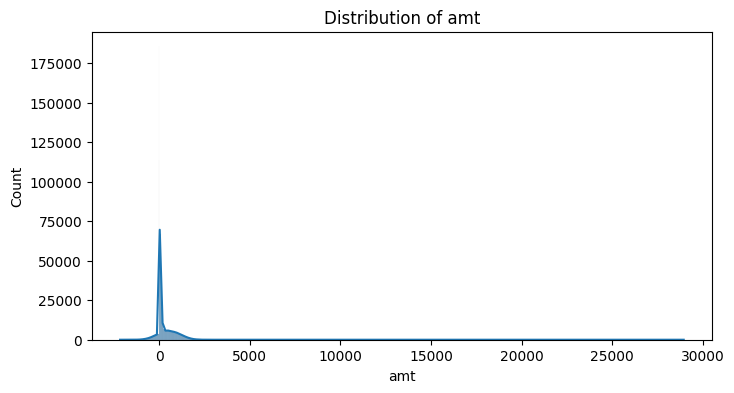

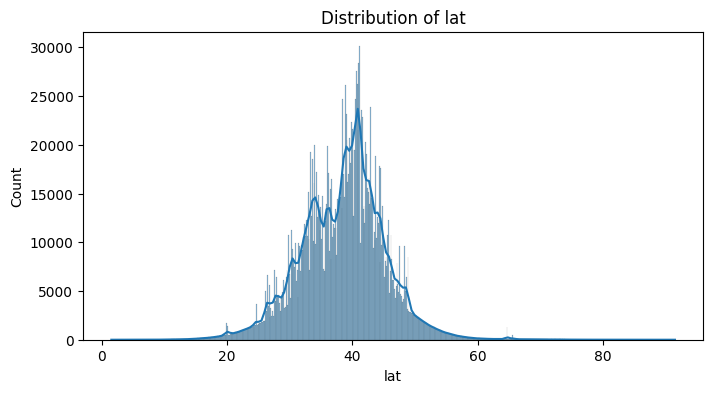

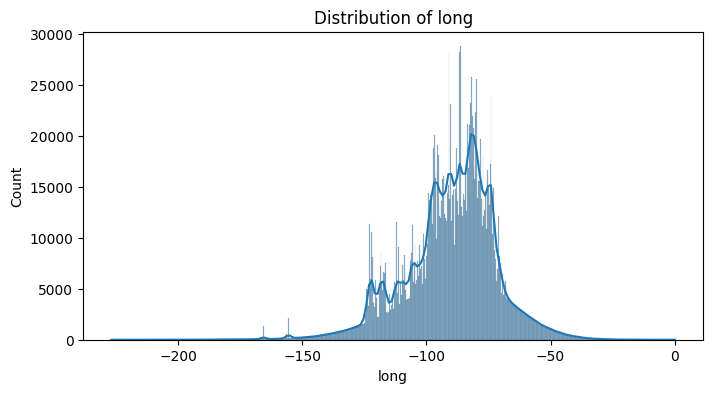

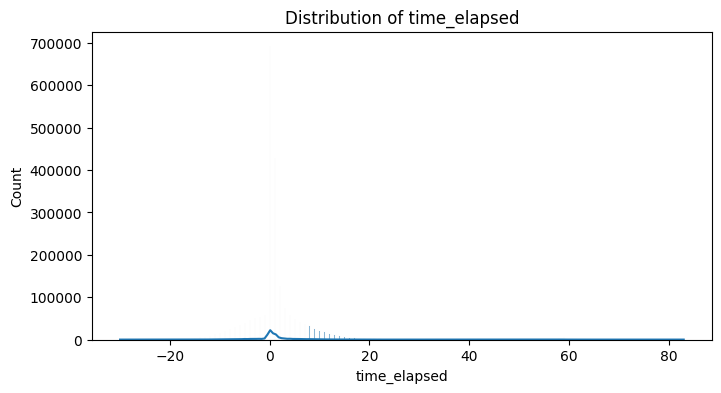

In [11]:
# Distribution plots for numerical features
numerical_features = ['amt', 'lat', 'long', 'time_elapsed']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(Credit_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [ ]:
Credit_df.drop(columns=['id', 'index','cc_num'], inplace=True)

## **Corelation Matix**

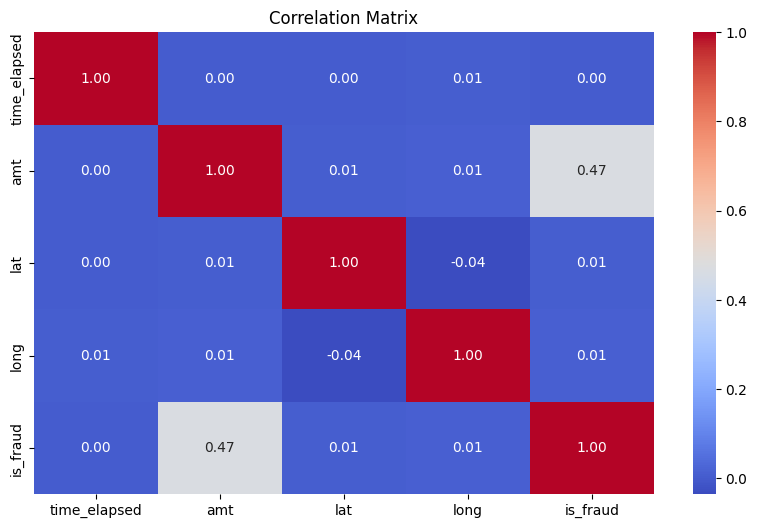

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = Credit_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## **Pair Plot**

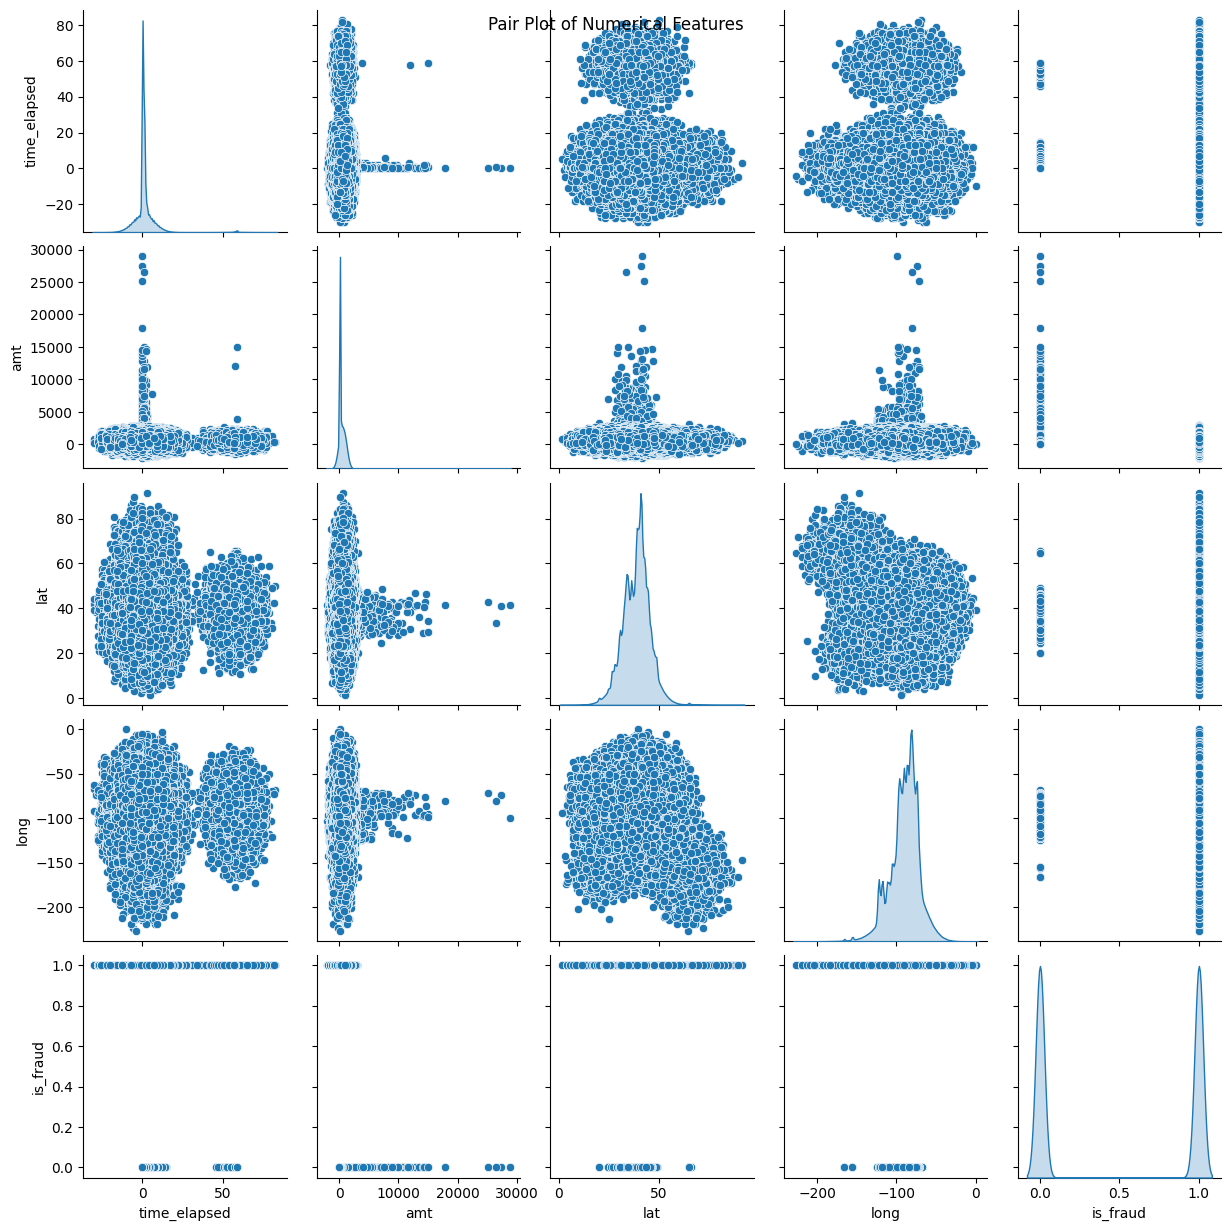

In [ ]:

# Create a pair plot for the numerical features
sns.pairplot(Credit_df, diag_kind='kde', corner=False)
plt.suptitle("Pair Plot of Numerical Features")  # Adjust title position
plt.show()

## **Scatter Plot**

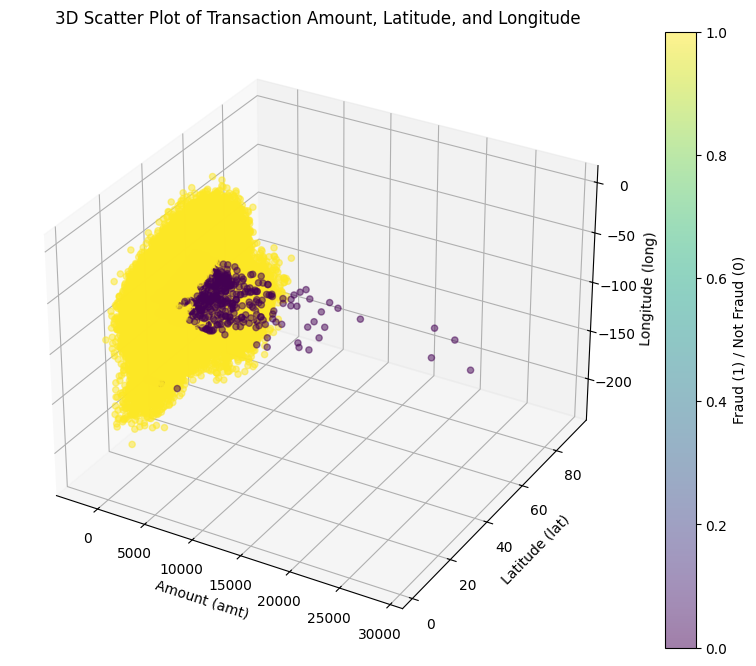

In [14]:

# Select three numerical features for the 3D scatter plot
x = Credit_df['amt']
y = Credit_df['lat']
z = Credit_df['long']
c = Credit_df['is_fraud'] # Color by fraud status

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)

ax.set_xlabel('Amount (amt)')
ax.set_ylabel('Latitude (lat)')
ax.set_zlabel('Longitude (long)')
ax.set_title('3D Scatter Plot of Transaction Amount, Latitude, and Longitude')

# Add a colorbar to show the mapping of colors to fraud status
fig.colorbar(scatter, label='Fraud (1) / Not Fraud (0)')

plt.show()

## **Box Plot**

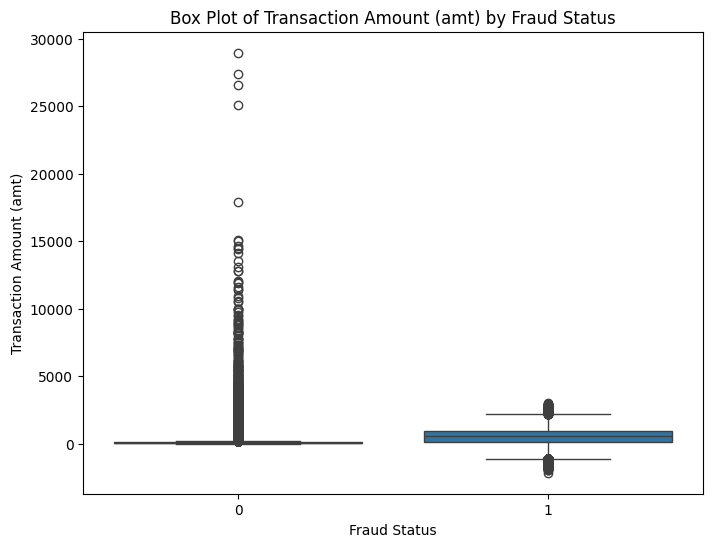

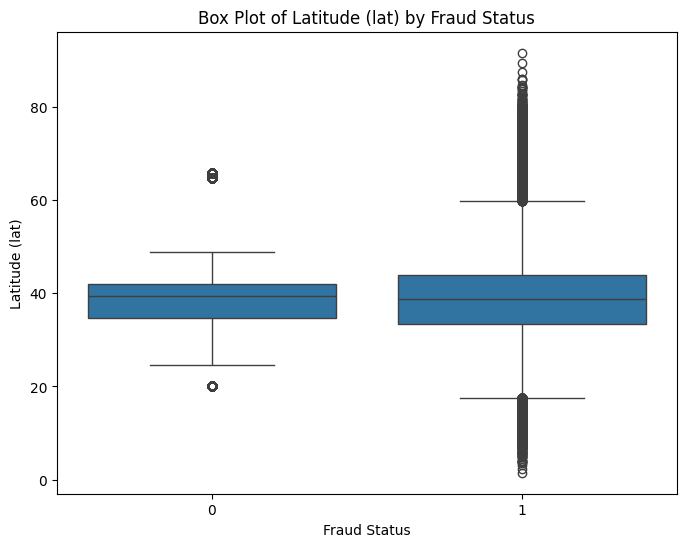

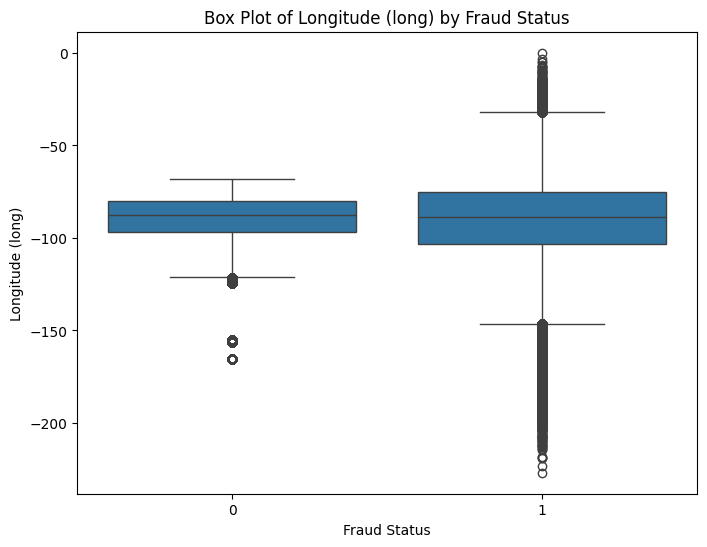

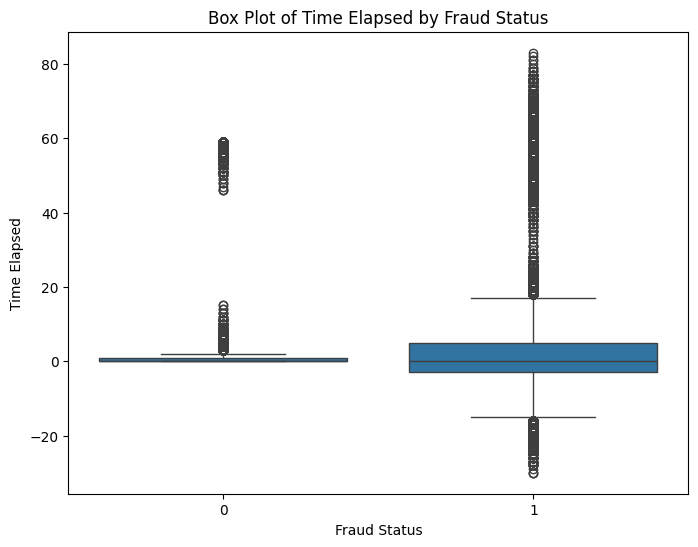

In [ ]:
# Box plot for 'amt'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=Credit_df)
plt.title('Box Plot of Transaction Amount (amt) by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount (amt)')
plt.show()

# Box plot for 'lat'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='lat', data=Credit_df)
plt.title('Box Plot of Latitude (lat) by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Latitude (lat)')
plt.show()

# Box plot for 'long'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='long', data=Credit_df)
plt.title('Box Plot of Longitude (long) by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Longitude (long)')
plt.show()

# Box plot for 'time_elapsed'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='time_elapsed', data=Credit_df)
plt.title('Box Plot of Time Elapsed by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Time Elapsed')
plt.show()

# **Model Implementation**

## **Train Test Split**

In [15]:

# Separate features and target variable
X = Credit_df.drop(columns=['is_fraud'])
y = Credit_df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




## **LogisticRegression**

### **Model Training**

In [16]:
from sklearn.linear_model import LogisticRegression

# Train a model and measure time
start_time = time.time()  # Record start time
model = LogisticRegression()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.8233
Precision: 0.9632
Recall: 0.6723
F1 Score: 0.7918
ROC AUC: 0.7695
Training Time: 7.8182 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85    312771
           1       0.96      0.67      0.79    312771

    accuracy                           0.82    625542
   macro avg       0.86      0.82      0.82    625542
weighted avg       0.86      0.82      0.82    625542



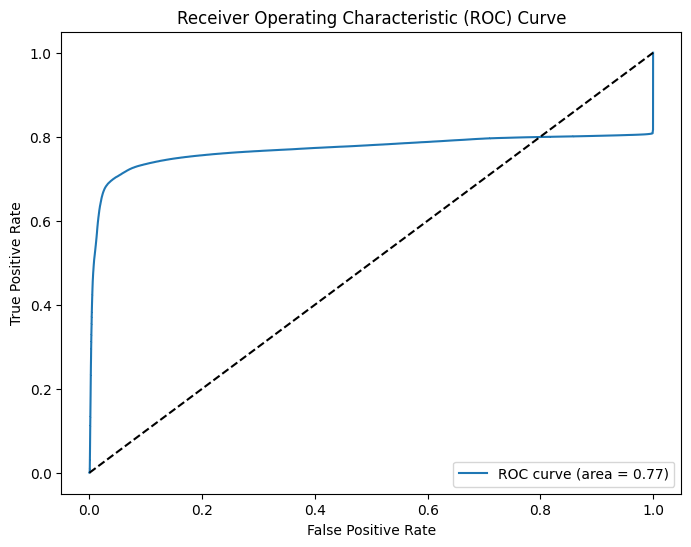

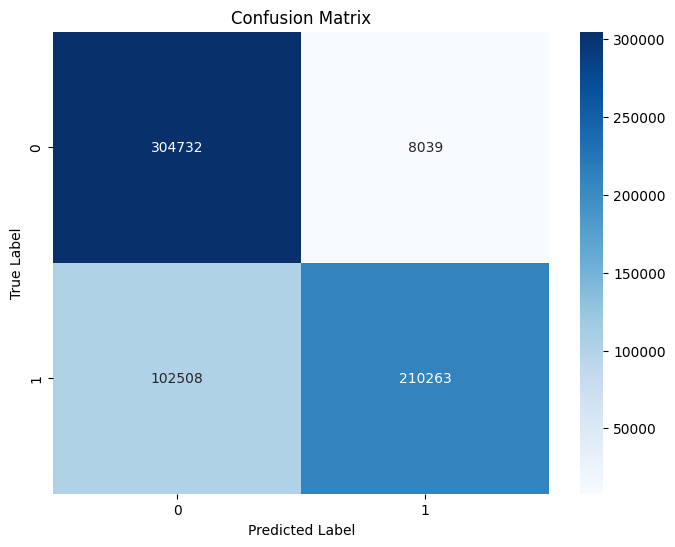

In [17]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **XGBClassifier**

### **Model Training**

In [18]:
from xgboost import XGBClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = XGBClassifier()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.9843
Precision: 0.9889
Recall: 0.9795
F1 Score: 0.9842
ROC AUC: 0.9979
Training Time: 12.0079 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



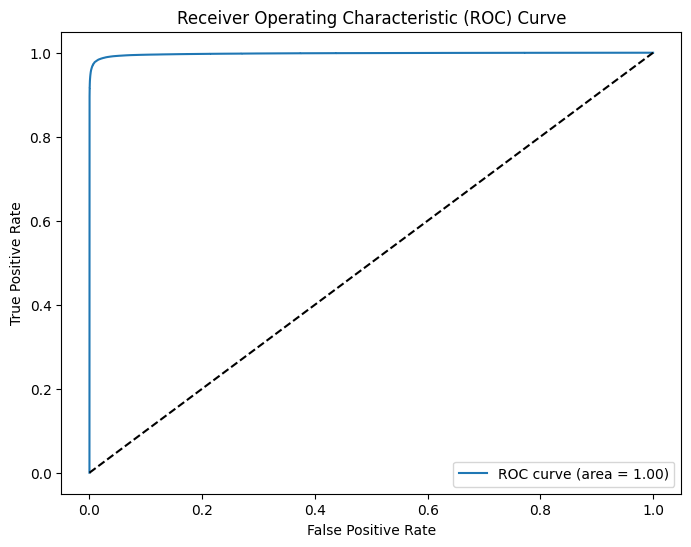

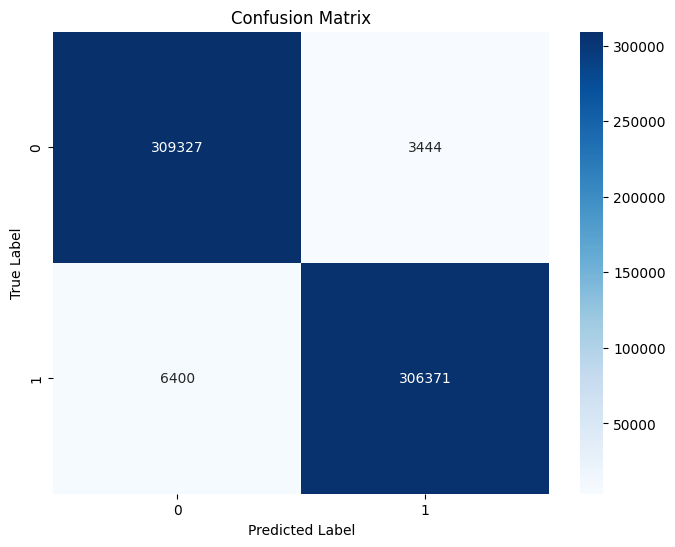

In [19]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **DecisionTreeClassifier**

### **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


Model Performance:
Accuracy: 0.9826
Precision: 0.9863
Recall: 0.9789
F1 Score: 0.9825
ROC AUC: 0.9826
Training Time: 22.9832 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



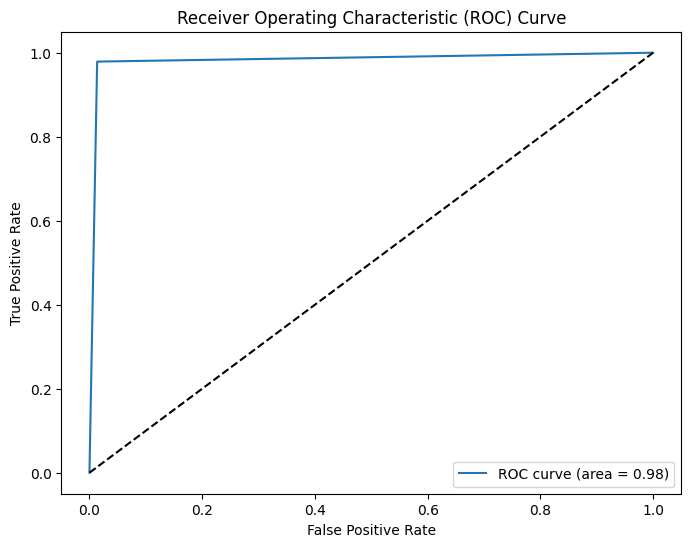

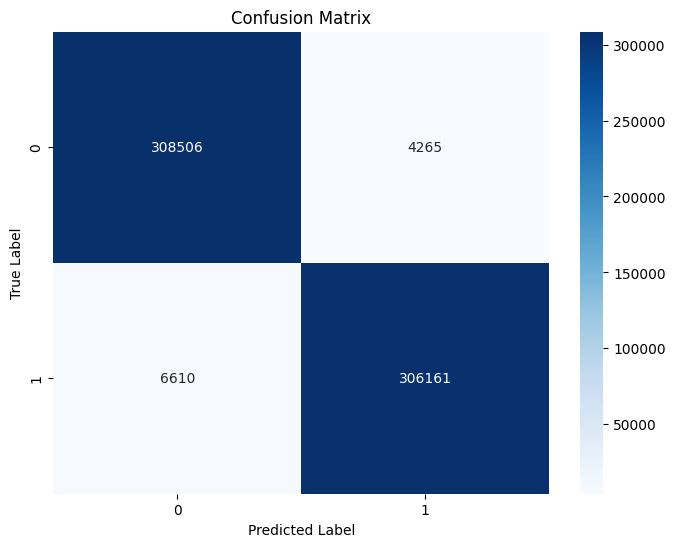

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## **RandomForestClassifier**

### **Model Training**

In [ ]:


# Train a model and measure time
start_time = time.time()  # Record start time
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.9848
Precision: 0.9897
Recall: 0.9798
F1 Score: 0.9847
ROC AUC: 0.9984
Training Time: 569.6242 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    312771
           1       0.99      0.98      0.98    312771

    accuracy                           0.98    625542
   macro avg       0.98      0.98      0.98    625542
weighted avg       0.98      0.98      0.98    625542



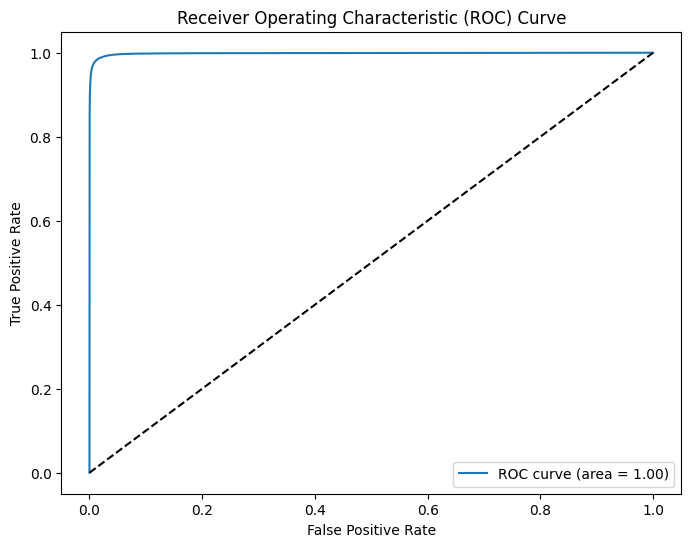

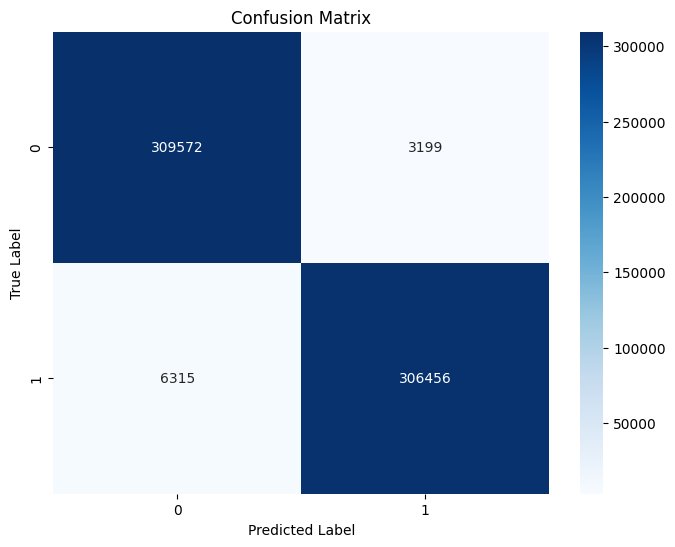

In [ ]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **MLPClassifier**

### **Model Training**

In [21]:
from sklearn.neural_network import MLPClassifier

# Train a model and measure time
start_time = time.time()  # Record start time
model = MLPClassifier(random_state=42, max_iter=10)
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Model Evalution**

Model Performance:
Accuracy: 0.9678
Precision: 0.9757
Recall: 0.9595
F1 Score: 0.9675
ROC AUC: 0.9924
Training Time: 190.3692 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    312771
           1       0.98      0.96      0.97    312771

    accuracy                           0.97    625542
   macro avg       0.97      0.97      0.97    625542
weighted avg       0.97      0.97      0.97    625542



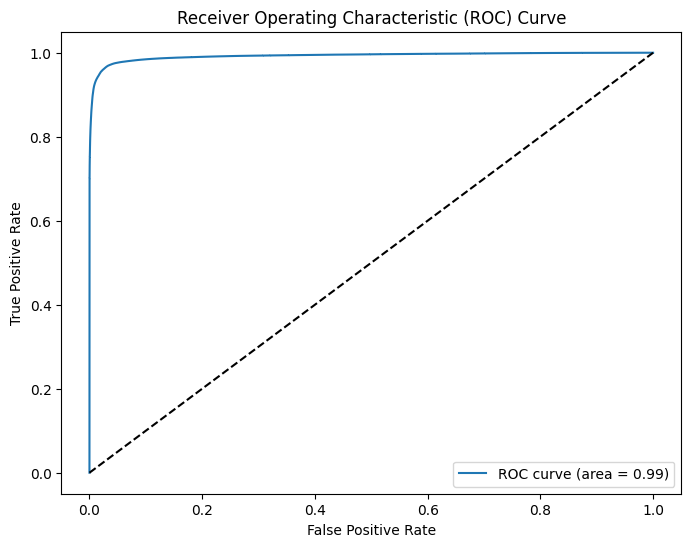

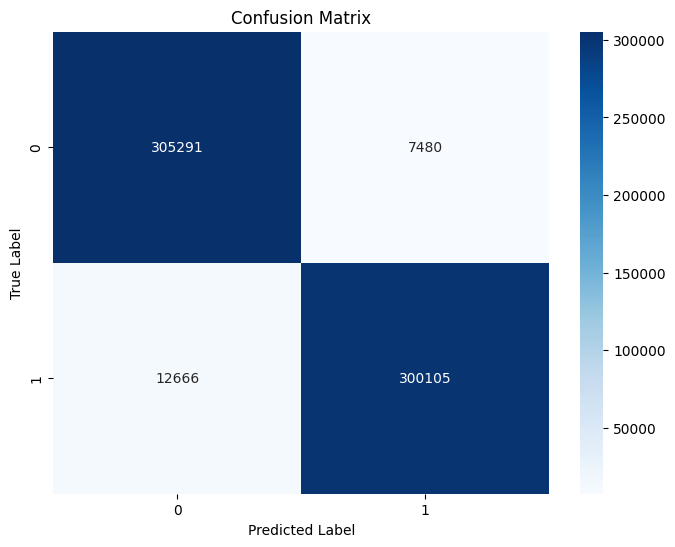

In [22]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **Logistic Regression with three feature Lat Lng and time**

In [23]:

# Separate features and target variable
X = Credit_df.drop(columns=['is_fraud','amt'])
y = Credit_df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




## **LogisticRegression**

### **Model Training**

In [25]:
from sklearn.linear_model import LogisticRegression

# Train a model and measure time
start_time = time.time()  # Record start time
model = LogisticRegression()
model.fit(X_train, y_train)
end_time = time.time()  # Record end time
training_time = end_time - start_time


### **Model Evalution**

Model Performance:
Accuracy: 0.4982
Precision: 0.4982
Recall: 0.5055
F1 Score: 0.5018
ROC AUC: 0.5058
Training Time: 1.0285 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.49    312771
           1       0.50      0.51      0.50    312771

    accuracy                           0.50    625542
   macro avg       0.50      0.50      0.50    625542
weighted avg       0.50      0.50      0.50    625542



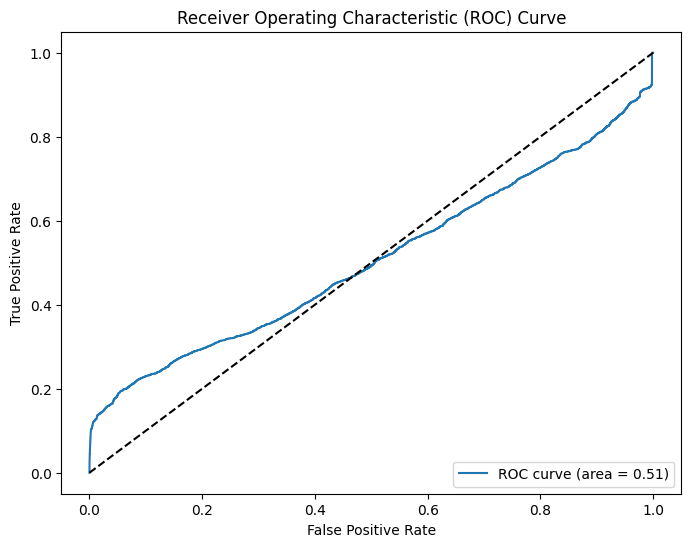

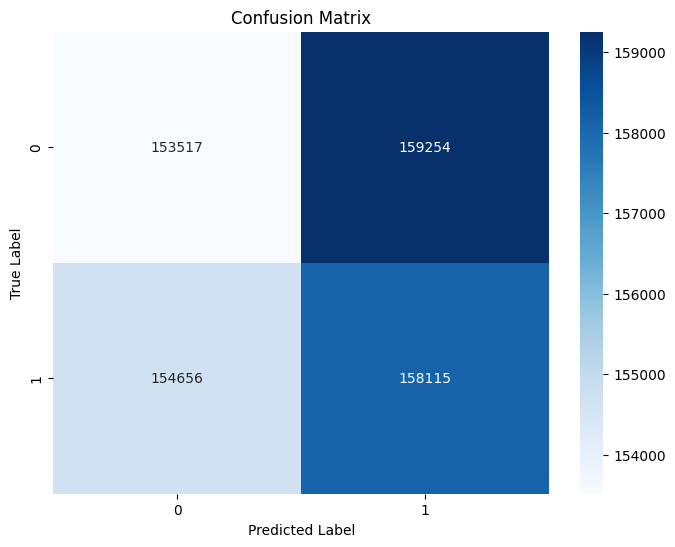

In [26]:

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print performance metrics
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training Time: {training_time:.4f} seconds")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
